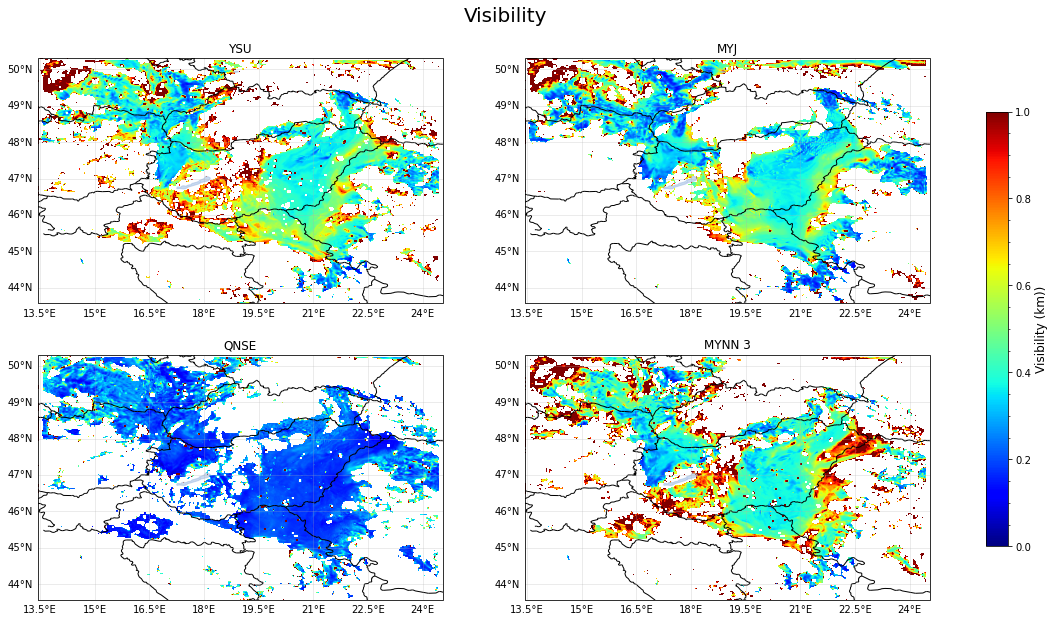

In [4]:
import numpy as np
from metpy.cbook import get_test_data
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from netCDF4 import Dataset
import metpy.calc as mpcalc
from metpy.units import units

#reading netcdf files
ysu= xr.open_dataset("wrf_ysu_24112020_06.nc")
myj = xr.open_dataset("wrf_myj_24112020_06.nc")
qnse = xr.open_dataset("wrf_QNSE_24112020_06.nc")
mynn = xr.open_dataset("wrf_mynn3_24112020_06.nc")


crs = ccrs.PlateCarree()
# Create the figure and plot background on different axes
fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), constrained_layout=False,
                           subplot_kw={'projection': crs})
axlist = axarr.flatten()

#===================================================================================================#
#               YSU - Visibility Calculation
#===================================================================================================#

lwc_y = ysu.metpy.parse_cf('QCLOUD')
lwc_y = (lwc_y*1e3)/1.3
# lwc = [i * 1e3 for i in lwc]
Nd_y = ysu.metpy.parse_cf('QNCLOUD')
Nd_y = Nd_y/1e6
#vis = 1.0002/(lwc*Nd)**0.6473 #Gultepe et el 2006
vis_y = 0.511/(lwc_y*Nd_y)**0.52 #song et el 2019

y_data = vis_y.isel(Time=0).sel(bottom_top=0)
y1 = vis_y.XLAT #reading lattitudes from variable
x1 = vis_y.XLONG #reading longitude

mp = axlist[0].imshow(y_data,norm=None,extent=(x1.min(),x1.max(), y1.min(), y1.max())
                   ,cmap='jet', origin='lower',vmin = 0, vmax =1)
axlist[0].set_title('YSU', fontsize=12)
#these are additional features you can add to geo plots (like boders, rivers, lakes..etc)
states_provinces = cfeature.NaturalEarthFeature(
       category='cultural',
       name='admin_1_states_provinces_lines',
       scale='10m',
       facecolor='none')
axlist[0].add_feature(cfeature.BORDERS,edgecolor='black')#,alpha=0.6)
axlist[0].add_feature(cfeature.LAKES, alpha=0.5)
# ax.add_feature(cfeature.COASTLINE,edgecolor='white',alpha=0.6)

#adding the long lat grids and enabling the tick labels
gl1 = axlist[0].gridlines(draw_labels=True, edgecolor='white', alpha=0.3)
gl1.top_labels = False
gl1.right_labels = False

#===================================================================================================#
#               MYJ - Visibility Calculation
#===================================================================================================#

lwc_m = myj.metpy.parse_cf('QCLOUD')
lwc_m = (lwc_m*1e3)/1.3
# lwc = [i * 1e3 for i in lwc]
Nd_m = myj.metpy.parse_cf('QNCLOUD')
Nd_m = Nd_m/1e6
#vis = 1.0002/(lwc*Nd)**0.6473 #Gultepe et el 2006
vis_m = 0.511/(lwc_m*Nd_m)**0.52 #song et el 2019

m_data = vis_m.isel(Time=0).sel(bottom_top=0)
y2 = vis_m.XLAT #reading lattitudes from variable
x2 = vis_m.XLONG #reading longitude

mp1 = axlist[1].imshow(m_data,norm=None,extent=(x2.min(),x2.max(), y2.min(), y2.max())
                   ,cmap='jet', origin='lower',vmin = 0, vmax =1)
axlist[1].set_title('MYJ', fontsize=12)
#these are additional features you can add to geo plots (like boders, rivers, lakes..etc)
states_provinces = cfeature.NaturalEarthFeature(
       category='cultural',
       name='admin_1_states_provinces_lines',
       scale='10m',
       facecolor='none')
axlist[1].add_feature(cfeature.BORDERS,edgecolor='black')#,alpha=0.6)
axlist[1].add_feature(cfeature.LAKES, alpha=0.5)
# ax.add_feature(cfeature.COASTLINE,edgecolor='white',alpha=0.6)

#adding the long lat grids and enabling the tick labels
gl2 = axlist[1].gridlines(draw_labels=True, edgecolor='white', alpha=0.3)
gl2.top_labels = False
gl2.right_labels = False

#===================================================================================================#
#               QNSE - Visibility Calculation
#===================================================================================================#

lwc_q = qnse.metpy.parse_cf('QCLOUD')
lwc_q = (lwc_q*1e3)/1.3
# lwc = [i * 1e3 for i in lwc]
Nd_q = qnse.metpy.parse_cf('QNCLOUD')
Nd_q = Nd_q/1e6
#vis = 1.0002/(lwc*Nd)**0.6473 #Gultepe et el 2006
vis_q = 0.511/(lwc_q*Nd_q)**0.52 #song et el 2019

q_data = vis_q.isel(Time=0).sel(bottom_top=0)
y3 = vis_q.XLAT #reading lattitudes from variable
x3 = vis_q.XLONG #reading longitude

mp2 = axlist[2].imshow(q_data,norm=None,extent=(x3.min(),x3.max(), y3.min(), y3.max())
                   ,cmap='jet', origin='lower',vmin = 0, vmax =1)
axlist[2].set_title('QNSE', fontsize=12)
#these are additional features you can add to geo plots (like boders, rivers, lakes..etc)
states_provinces = cfeature.NaturalEarthFeature(
       category='cultural',
       name='admin_1_states_provinces_lines',
       scale='10m',
       facecolor='none')
axlist[2].add_feature(cfeature.BORDERS,edgecolor='black')#,alpha=0.6)
axlist[2].add_feature(cfeature.LAKES, alpha=0.5)
# ax.add_feature(cfeature.COASTLINE,edgecolor='white',alpha=0.6)

#adding the long lat grids and enabling the tick labels
gl3 = axlist[2].gridlines(draw_labels=True, edgecolor='white', alpha=0.3)
gl3.top_labels = False
gl3.right_labels = False

#===================================================================================================#
#               MYNN 3 - Visibility Calculation
#===================================================================================================#

lwc_mn = mynn.metpy.parse_cf('QCLOUD')
lwc_mn = (lwc_mn*1e3)/1.3
# lwc = [i * 1e3 for i in lwc]
Nd_mn = mynn.metpy.parse_cf('QNCLOUD')
Nd_mn = Nd_mn/1e6
#vis = 1.0002/(lwc*Nd)**0.6473 #Gultepe et el 2006
vis_mn = 0.511/(lwc_mn*Nd_mn)**0.52 #song et el 2019

mn_data = vis_mn.isel(Time=0).sel(bottom_top=0)
y4 = vis_mn.XLAT #reading lattitudes from variable
x4 = vis_mn.XLONG #reading longitude

mp3 = axlist[3].imshow(mn_data,norm=None,extent=(x4.min(),x4.max(), y4.min(), y4.max())
                   ,cmap='jet', origin='lower',vmin = 0, vmax =1)
axlist[3].set_title('MYNN 3', fontsize=12)
#these are additional features you can add to geo plots (like boders, rivers, lakes..etc)
states_provinces = cfeature.NaturalEarthFeature(
       category='cultural',
       name='admin_1_states_provinces_lines',
       scale='10m',
       facecolor='none')
axlist[3].add_feature(cfeature.BORDERS,edgecolor='black')#,alpha=0.6)
axlist[3].add_feature(cfeature.LAKES, alpha=0.5)
# ax.add_feature(cfeature.COASTLINE,edgecolor='white',alpha=0.6)

#adding the long lat grids and enabling the tick labels
gl4 = axlist[3].gridlines(draw_labels=True, edgecolor='white', alpha=0.3)
gl4.top_labels = False
gl4.right_labels = False

axbar = [axlist[0],axlist[1],axlist[2],axlist[3]]#,axlist[4],axlist[5],axlist[6],axlist[7]]
cbar = fig.colorbar(mp, ax=axbar,shrink=0.8)
cbar.minorticks_on()
cbar.set_label('Visibility (km))',fontsize=12)
plt.savefig("multi_Visibility.jpg",dpi=300)
fig.suptitle('Visibility',x=0.45, y=.95,fontsize=20)
plt.show()